In [32]:
import torch
import torch.nn as nn

class CNN(nn.Module):
    
    # Crio as camadas da rede
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.avg_pool = nn.AvgPool2d(kernel_size=2, stride=2)

    # Conecto as camadas da rede
    def forward(self, x):
        x = self.conv1(x)
        x = self.avg_pool(x)
        return x

In [33]:
net = CNN()

In [4]:
import torchvision
import torchvision.transforms as transforms
from PIL import Image

In [6]:
lenna = Image.open("../Pictures/Lenna.png")

### Transformando Imagens em Tensores

In [22]:
transform = transforms.Compose([
    # Redimensiona o tamanho da imagem
    transforms.Resize((224, 224)),
    # Transforma em Tensor
    transforms.ToTensor(),
    # Normaliza o tensor 
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

lenna_tensor = transform(lenna).unsqueeze(0)
lenna_tensor.shape

torch.Size([1, 3, 224, 224])

In [34]:
with torch.no_grad():
    output = net(lenna_tensor)
    
_, predicted = torch.max(output.data, 1)

print(predicted)

tensor([[[10,  7,  7,  ...,  1,  1,  7],
         [ 5,  5,  5,  ...,  1, 13, 13],
         [ 5,  5,  5,  ..., 13,  8,  8],
         ...,
         [ 8,  8,  8,  ...,  8,  8,  8],
         [ 8,  8,  8,  ...,  8, 11,  8],
         [11, 11, 11,  ..., 11,  1,  1]]])


# Visualizando a saida de uma CNN

#### Com Heatmap

In [30]:
import matplotlib.pyplot as plt
import numpy as np

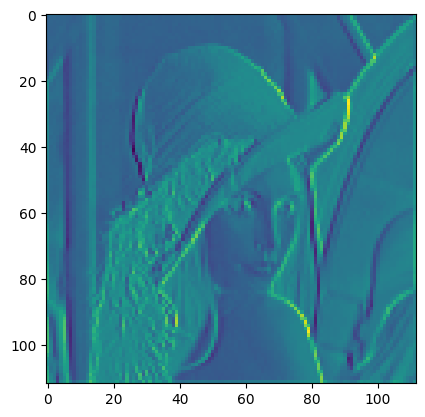

In [35]:
feature_map = output[0, 0].detach().numpy()

# Normalizando o mapa de características
feature_map -= feature_map.min()
feature_map /= feature_map.max()

# Gerando um mapa de calor
heatmap = np.uint8(255 * feature_map)

# Visualizando o mapa de calor
plt.imshow(heatmap)
plt.show()

#### Os filtros

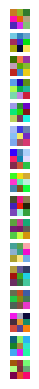

In [38]:
# Obtendo os filtros da camada convolucional
filters = net.conv1.weight.data.clone()

# Normalizando os filtros
filters -= filters.min()
filters /= filters.max()

# Visualizando os filtros
fig, axarr = plt.subplots(filters.size(0))
for idx in range(filters.size(0)):
    axarr[idx].imshow(filters[idx].squeeze(), cmap='gray')
    axarr[idx].axis('off')
plt.show()